In [1]:
import sys
sys.path.append('..')

In [2]:
import underworld as uw
from underworld import function as fn
import glucifer
import numpy as np
import math

import planetengine
from planetengine.visualisation import quickShow
from planetengine.utilities import make_projector
from planetengine.standards import make_pevar

In [3]:
import modelscripts

In [4]:
initial = {
    'temperatureField': {'IC': planetengine.initials.sinusoidal.IC()},
    'materialVar': {'IC': planetengine.initials.extents.IC(([1], planetengine.shapes.trapezoid()))}
    }

In [5]:
system = modelscripts.MS98X_systemscript.build(res = 64, f = 0.5, tau = 1e5)

In [6]:
planetengine.initials.apply(initial, system)

In [7]:
system.solve()

In [8]:
isYieldingFn = fn.branching.conditional([
    (system.creepViscFn > system.plasticViscFn, 1),
    (True, 0)
    ])

In [34]:
obsVars = {
    'temperature': system.temperatureField,
    'velocity': system.velocityField,
    'material': system.materialVar,
#     'viscosity': system.viscosityFn,
#     'yielding': isYieldingFn,
    }

In [10]:
import glucifer

In [11]:
help(glucifer.objects.Drawing)

Help on class Drawing in module glucifer.objects:

class Drawing(underworld._stgermain.StgCompoundComponent)
 |  This is the base class for all drawing objects but can also be instantiated 
 |  as is for direct/custom drawing.
 |  
 |  Note that the defaults here are often overridden by the child objects.
 |  
 |  Parameters
 |  ----------
 |  colours: str, list.
 |      See ColourMap class docstring for further information
 |  colourMap: glucifer.objects.ColourMap
 |      A ColourMap object for the object to use.
 |      This should not be specified if 'colours' is specified.
 |  opacity: float
 |      Opacity of object. If provided, must take values from 0. to 1.
 |  colourBar: bool
 |      Bool to determine if a colour bar should be rendered.
 |  valueRange: tuple, list
 |      See ColourMap class docstring for further information
 |  logScale: bool
 |      See ColourMap class docstring for further information
 |  discrete: bool
 |      See ColourMap class docstring for further info

In [35]:
myfig = planetengine.visualisation.QuickFig(
    *obsVars.values()
    )

Fitted 3 variables to the figure.



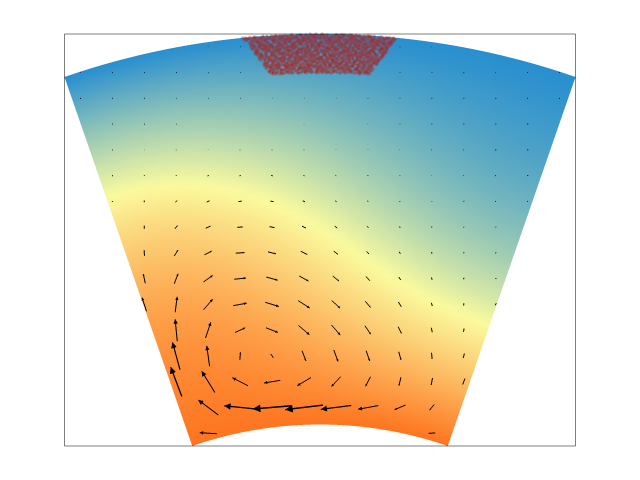

In [36]:
myfig.show()

In [24]:
myfig.fig.append(
    glucifer.objects.Surface(
        system.mesh,
        system.pressureField,
        colourBar = False,
        opacity = 1.
        )
    )


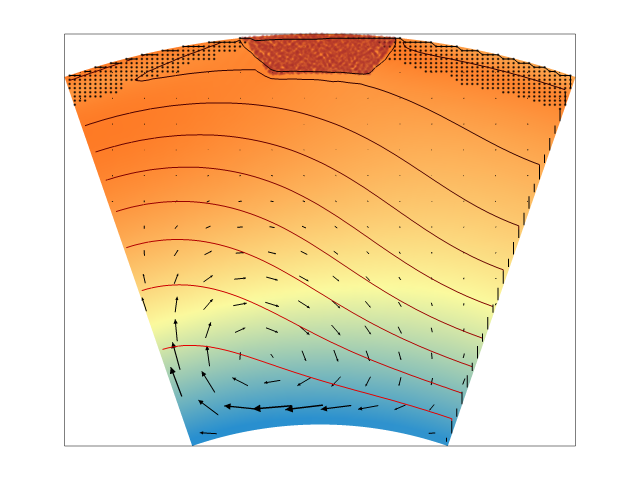

In [25]:
myfig.show()

In [26]:
system.temperatureField

In [27]:
planetengine.unpack_var(system.temperatureField)

(<underworld.mesh._meshvariable.MeshVariable at 0x7f0f6087ffd0>,
 'meshVar',
 array([[  1.00000000e+00],
        [  9.74561465e-01],
        [  9.49146572e-01],
        ..., 
        [  5.08534281e-02],
        [  2.54385349e-02],
        [  4.24173225e-16]]),
 'double',
 1)

In [28]:
myvar = planetengine.standardise(system.temperatureField)

In [ ]:
system.temperatureField.pevar

In [29]:
myvar

In [ ]:
planetengine.quickShow(viscosityFn, pressureField)

In [13]:
# planetengine.initials.preview(initial['temperatureField']['IC'])